In [1]:
import numpy as np
import pandas as pd 

from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# сохраним датафрейм из csv-файла в переменную df
df = pd.read_csv('DATA/clean.csv')

In [4]:
#выведем первые 5 строк датафрейма
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,70.0


In [5]:
# размер датафрейма
df.shape

(922, 13)

In [6]:
#зададим X и y
X = df.drop('Соотношение матрица-наполнитель', axis=1)
y = df['Соотношение матрица-наполнитель']

In [7]:
# создадим обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# размеры обучающих и тестовых наборов данных
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(737, 12) (185, 12) (737,) (185,)


In [9]:
# нейронная сеть
model = Sequential()
model.add(BatchNormalization(input_shape=(X_train.shape[1],)))
model.add(Dense(128, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(64, kernel_initializer='normal', activation='tanh'))
model.add(Dense(20, kernel_initializer='normal', activation='sigmoid'))
model.add(Dense(1, activation='linear'))

In [10]:
# информация о нейронной сети
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 12)               48        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 20)                1300      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 11,289
Trainable params: 11,265
Non-trainable params: 24
___________________________________________________

In [11]:
# подключим RMSE из иблиотеки tensorflow и поместим ее в переменную rmse
rmse = tf.keras.metrics.RootMeanSquaredError()

In [12]:
# компиляция модели
model.compile(loss='mse', optimizer='adam', metrics=[rmse])

In [13]:
# обучение модели
model_hist = model.fit(X_train, 
    y_train, 
    epochs = 40,
    validation_split = 0.2)

Epoch 1/40
19/19 [==============================] - 3s 14ms/step - loss: 5.2839 - root_mean_squared_error: 2.2987 - val_loss: 1.6715 - val_root_mean_squared_error: 1.2929
Epoch 2/40
19/19 [==============================] - 0s 5ms/step - loss: 0.9855 - root_mean_squared_error: 0.9927 - val_loss: 0.8201 - val_root_mean_squared_error: 0.9056
Epoch 3/40
19/19 [==============================] - 0s 5ms/step - loss: 0.8137 - root_mean_squared_error: 0.9021 - val_loss: 0.8372 - val_root_mean_squared_error: 0.9150
Epoch 4/40
19/19 [==============================] - 0s 5ms/step - loss: 0.8118 - root_mean_squared_error: 0.9010 - val_loss: 0.8248 - val_root_mean_squared_error: 0.9082
Epoch 5/40
19/19 [==============================] - 0s 5ms/step - loss: 0.8019 - root_mean_squared_error: 0.8955 - val_loss: 0.8207 - val_root_mean_squared_error: 0.9059
Epoch 6/40
19/19 [==============================] - 0s 5ms/step - loss: 0.8016 - root_mean_squared_error: 0.8953 - val_loss: 0.8212 - val_root_mean_s

In [14]:
# вычисляем метрики ошибок и выводим их на экран
y_pred_model = model.predict(X_test)

print('Результаты работы нейронной сети:')
print('MAE: ', round(mean_absolute_error(y_test, y_pred_model), 3))
print('MAPE: ', round(mean_absolute_percentage_error(y_test, y_pred_model), 3))
print("RMSE: ", round(np.sqrt(mean_squared_error(y_test, y_pred_model)), 3))

6/6 [==============================] - 0s 2ms/step
Результаты работы нейронной сети:
MAE:  0.727
MAPE:  0.293
RMSE:  0.883


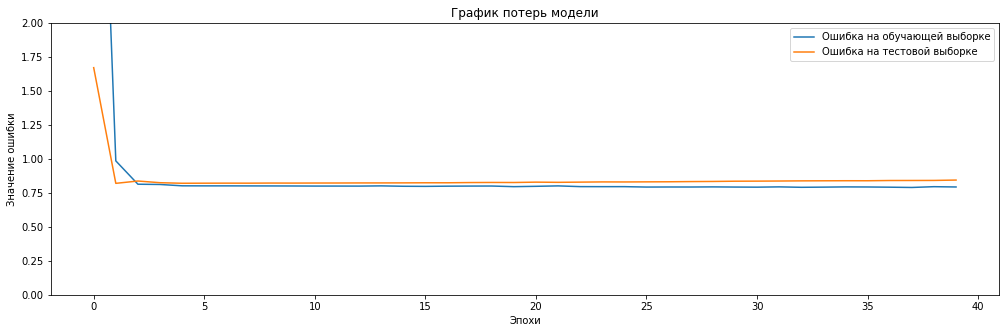

In [15]:
# график ошибок на обучающей и тестовой выборках
plt.figure(figsize = (17,5))
plt.plot(model_hist.history['loss'],
        label = 'ошибка на обучающей выборке')
plt.plot(model_hist.history['val_loss'],
        label = 'ошибка на тестовой выборке')
plt.title('График потерь модели')
plt.ylabel('Значение ошибки')
plt.xlabel('Эпохи')
plt.ylim(0,2)
plt.legend(['Oшибка на обучающей выборке', 'Ошибка на тестовой выборке'], loc='best');